# ArewaDS Python Programming Fellowship's Project

In [ ]:
import requests

language = 'javascript' #change this variable to get the result for other languages

url = f'https://api.github.com/search/repositories?q=language:{language}&sort=stars'

headers = {'Accept':'application/vnd.github.v3+json'}

response = requests.get(url,headers=headers)







#### converting the Json formatted data received to a python dictionary

In [ ]:
response_data = response.json()

print(response_data.keys())


dict_keys(['total_count', 'incomplete_results', 'items'])


#### Details on the response received

In [ ]:
print("The Total Repositories Received is {}".format(len(response_data['items'])))


The Total Repositories Received is 30


#### Examining the first repo at index 0

In [ ]:
first_repo = response_data['items'][0]

# for key, value in first_repo.items()[]:
#     print(f'{key} : {value}')



#### Lets Examine only some few of the values of the first repo that are important for our project


In [ ]:
print("Name: {}".format(first_repo['name']))
print("Owner: {}".format(first_repo['owner']['login']))
print("Stars: {}".format(first_repo['stargazers_count']))
print("Repository: {}".format(first_repo['html_url']))
print("Created: {}".format(first_repo['created_at']))
print("Updated: {}".format(first_repo['updated_at']))
print("Description: {}".format(first_repo['description']))

Name: react
Owner: facebook
Stars: 231562
Repository: https://github.com/facebook/react
Created: 2013-05-24T16:15:54Z
Updated: 2025-01-22T11:31:50Z
Description: The library for web and native user interfaces.


#### Summarising The Top Repository


In [ ]:
for repo in response_data['items']:
    print("Name: {}".format(repo['name']))
    print("Owner: {}".format(repo['owner']['login']))
    print("Stars: {}".format(repo['stargazers_count']))
    print("Repository: {}".format(repo['html_url']))
    print("Created: {}".format(repo['created_at']))
    print("Updated: {}".format(repo['updated_at']))
    print("Description: {}".format(repo['description']))
    print()

Name: react
Owner: facebook
Stars: 231562
Repository: https://github.com/facebook/react
Created: 2013-05-24T16:15:54Z
Updated: 2025-01-22T11:31:50Z
Description: The library for web and native user interfaces.

Name: javascript-algorithms
Owner: trekhleb
Stars: 189626
Repository: https://github.com/trekhleb/javascript-algorithms
Created: 2018-03-24T07:47:04Z
Updated: 2025-01-22T11:00:40Z
Description: 📝 Algorithms and data structures implemented in JavaScript with explanations and links to further readings

Name: bootstrap
Owner: twbs
Stars: 171252
Repository: https://github.com/twbs/bootstrap
Created: 2011-07-29T21:19:00Z
Updated: 2025-01-22T11:36:23Z
Description: The most popular HTML, CSS, and JavaScript framework for developing responsive, mobile first projects on the web.

Name: javascript
Owner: airbnb
Stars: 145881
Repository: https://github.com/airbnb/javascript
Created: 2012-11-01T23:13:50Z
Updated: 2025-01-22T11:40:03Z
Description: JavaScript Style Guide

Name: next.js
Owner: v

#### Visualizing our generated data using Matplotlib


In [ ]:
repo_names = [repo['name'] for repo in response_data['items']]
stars = [repo['stargazers_count'] for repo in response_data['items']]



#### Making Visualization


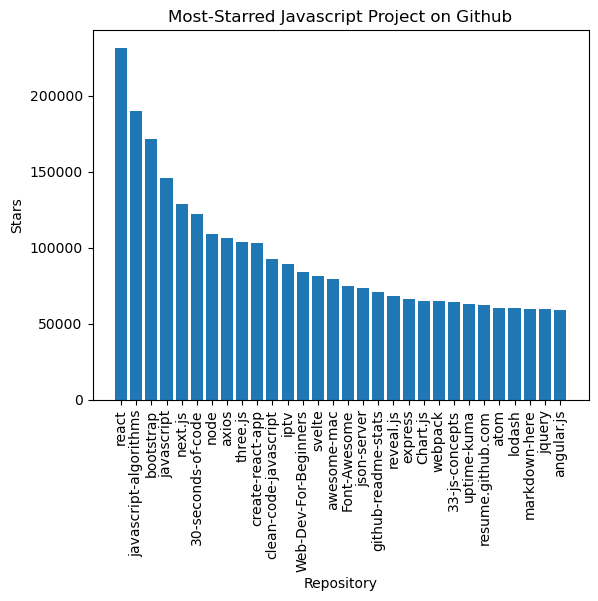

In [ ]:
import matplotlib.pyplot as plt

plt.bar(repo_names,stars)
plt.title(f"Most-Starred {language.title()} Project on Github")
plt.xlabel("Repository")
plt.ylabel("Stars")
plt.xticks(rotation=90)
plt.show()

#### Refining the above plot

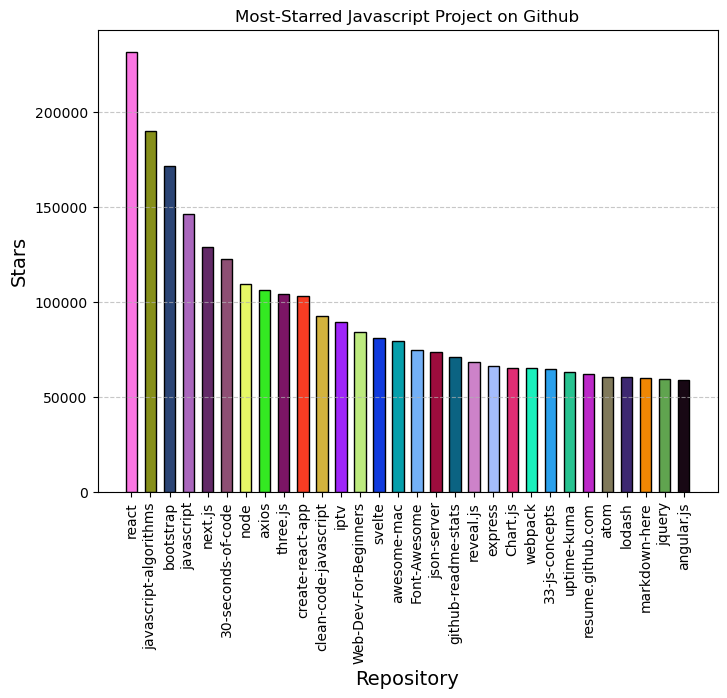

In [ ]:
#random colors generated using my list_hexa_colors() from 30DaysOfPython Module 14

colors = ['#FA76E2', '#868F19', '#2B4575', '#AA67BD', '#622967', '#8E4F74', '#E7F866', '#34E922', '#7C1565', '#F73C23', '#D3B33D', '#9F25F9', '#BDEA7F', '#113BDE', '#059FAB', '#73B0F7', '#9C0C3D', '#0B6382', '#CD82C9', '#A4BCFC', '#E12D74', '#1AF0BC', '#2AA0EC', '#28C390', '#BC29C8', '#80795A', '#3D2871', '#F08703', '#60A44F', '#180814']


plt.figure(figsize=(8, 6)) 

plt.bar(repo_names,stars,color=colors,edgecolor='black',width=0.6)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.title(f"Most-Starred {language.title()} Project on Github")
plt.xlabel("Repository", fontsize=14)
plt.ylabel("Stars", fontsize=14)
plt.xticks(rotation=90)
plt.show()

### Exploring the Hacker News API

In [ ]:
import json
url = 'https://hacker-news.firebaseio.com/v0/item/19155826.json'

response = requests.get(url)

print(response.status_code)


200
{'by': 'jimktrains2', 'descendants': 221, 'id': 19155826, 'kids': [19156572, 19158857, 19156773, 19157251, 19156415, 19159820, 19157154, 19156385, 19156489, 19158522, 19156755, 19156974, 19158319, 19157034, 19156935, 19158935, 19157531, 19158638, 19156466, 19156758, 19156565, 19156498, 19156335, 19156041, 19156704, 19159047, 19159127, 19156217, 19156375, 19157945], 'score': 728, 'time': 1550085414, 'title': 'Nasa’s Mars Rover Opportunity Concludes a 15-Year Mission', 'type': 'story', 'url': 'https://www.nytimes.com/2019/02/13/science/mars-opportunity-rover-dead.html'}


#### Exploring the structure of the API's Data


In [ ]:
response_data = response.json()

#Writing the response data into a file as json for readability

filename = 'hacker_news.json'

with open(filename, 'w') as file_obj:
    json.dump(response_data,file_obj, indent=4)

#### Getting the summaries of news posted on Hacker News Homepage


In [ ]:
url = 'https://hacker-news.firebaseio.com/v0/topstories.json'

response = requests.get(url)

print(response.status_code)

200


#### Getting The Top news Ids and storing each respond associated with each post into a dictionary


In [ ]:
top_news_ids = response.json()

top_news_list = []

#looping through top_news_ids and making an API call for each id

for id in top_news_ids[:30]:
    url = f'https://hacker-news.firebaseio.com/v0/item/{id}.json'
    response = requests.get(url)
    response_data = response.json()

    '''some post are missing a key in the dict of data
       therefore is giving an error when trying to retrieved there keys, we
       can solve it by using conditional statement to check for the ID to skip
       it but thats not a very good solution, therefore we can just verify if
       each key we are calling exist in the dict before retrieving..
    '''

    #dict to store each respond
    
    try:
        response_dict = {
            'title': response_data['title'],
            'link': response_data['url'],
            'comments': response_data['descendants']
        }
        top_news_list.append(response_dict)
    except KeyError: #Dict with keyerror will be skipped
        continue




[{'title': 'Ross Ulbricht granted a full pardon', 'link': 'https://twitter.com/Free_Ross/status/1881851923005165704', 'comments': 1301}, {'title': 'Show HN: NotepadJs – A cross-platform love letter to Notepad', 'link': 'https://github.com/itamarom/notepadjs', 'comments': 10}, {'title': 'Stargate Project: SoftBank, OpenAI, Oracle, MGX to build data centers', 'link': 'https://apnews.com/article/trump-ai-openai-oracle-softbank-son-altman-ellison-be261f8a8ee07a0623d4170397348c41', 'comments': 842}, {'title': '0-click deanonymization attack targeting Signal, Discord, other platforms', 'link': 'https://gist.github.com/hackermondev/45a3cdfa52246f1d1201c1e8cdef6117', 'comments': 398}, {'title': 'The Ribbon Microphone', 'link': 'https://khz.ac/sound/ribbon-mic/', 'comments': 6}, {'title': 'Infinigen', 'link': 'https://infinigen.org/', 'comments': 13}, {'title': 'Isolating complexity is the essence of successful abstractions', 'link': 'https://v5.chriskrycho.com/journal/essence-of-successful-abs

#### sorting the the top_news_list by number of comments


In [ ]:
from operator import itemgetter

top_news_list = sorted(top_news_list,key=itemgetter('comments'),reverse=True)

print([news['comments'] for news in top_news_list])

[1301, 842, 398, 177, 127, 121, 83, 79, 73, 60, 38, 38, 33, 25, 24, 24, 19, 19, 16, 13, 11, 10, 6, 5, 4, 2, 1, 0]


In [ ]:
for news in top_news_list:
    print("Title: {}".format(news['title']))
    print("Discussion Link: {}".format(news['link']))
    print("Comments: {}".format(news['comments']))
    print()

Title: Ross Ulbricht granted a full pardon
Discussion Link: https://twitter.com/Free_Ross/status/1881851923005165704
Comments: 1301

Title: Stargate Project: SoftBank, OpenAI, Oracle, MGX to build data centers
Discussion Link: https://apnews.com/article/trump-ai-openai-oracle-softbank-son-altman-ellison-be261f8a8ee07a0623d4170397348c41
Comments: 842

Title: 0-click deanonymization attack targeting Signal, Discord, other platforms
Discussion Link: https://gist.github.com/hackermondev/45a3cdfa52246f1d1201c1e8cdef6117
Comments: 398

Title: Invisible Electrostatic Wall at 3M plant (1996)
Discussion Link: http://amasci.com/weird/unusual/e-wall.html
Comments: 177

Title: Why is zero plural? (2024)
Discussion Link: https://ell.stackexchange.com/questions/352455/why-is-zero-plural
Comments: 127

Title: Hunyuan3D 2.0 – High-Resolution 3D Assets Generation
Discussion Link: https://github.com/Tencent/Hunyuan3D-2
Comments: 121

Title: Calm tech certification "rewards" less distracting tech
Discuss

#### plottiing a Bar chat to see which post have the highest comments


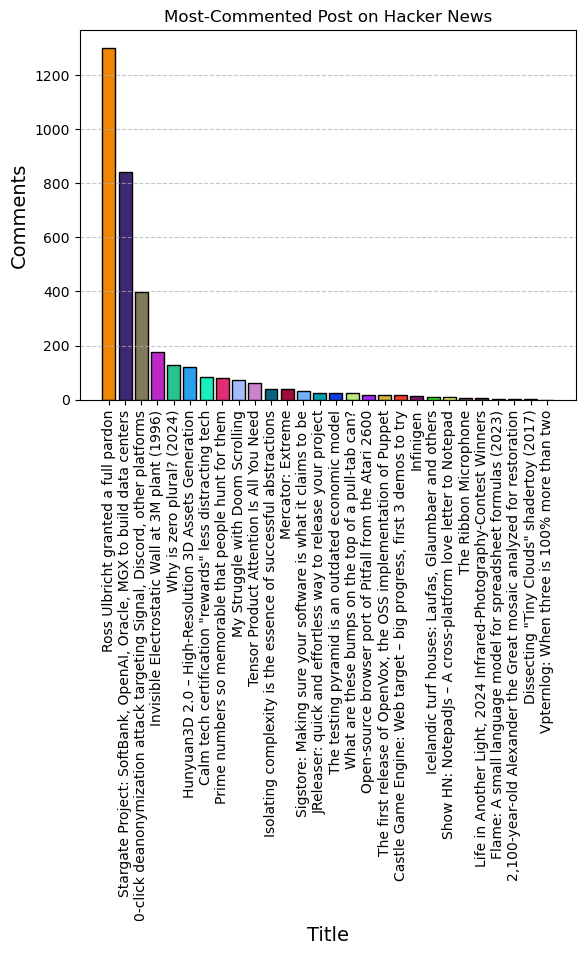

In [ ]:
comments = [news['comments'] for news in top_news_list]

labels = [news['title'] for news in top_news_list]

colors = ['#FA76E2', '#868F19', '#2B4575', '#AA67BD', '#622967', '#8E4F74', '#E7F866', '#34E922', '#7C1565', '#F73C23', '#D3B33D', '#9F25F9', '#BDEA7F', '#113BDE', '#059FAB', '#73B0F7', '#9C0C3D', '#0B6382', '#CD82C9', '#A4BCFC', '#E12D74', '#1AF0BC', '#2AA0EC', '#28C390', '#BC29C8', '#80795A', '#3D2871', '#F08703',]


plt.bar(labels,comments,color=list(reversed(colors)),edgecolor='black')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.title(f"Most-Commented Post on Hacker News")
plt.xlabel("Title", fontsize=14)
plt.ylabel("Comments", fontsize=14)
plt.xticks(rotation=90)


plt.show()